In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Female    112
Male       88
Name: Gender, dtype: int64


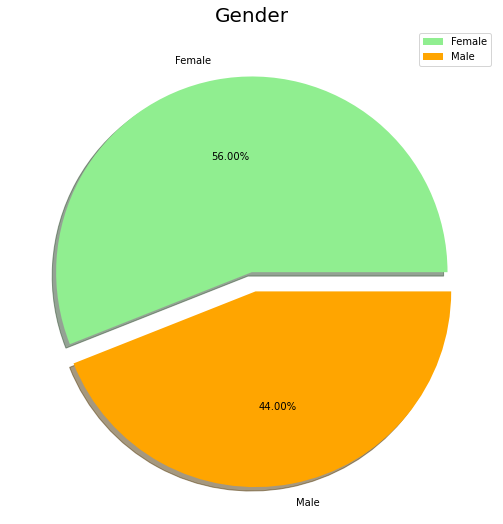

In [4]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
print(df['Gender'].value_counts())
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

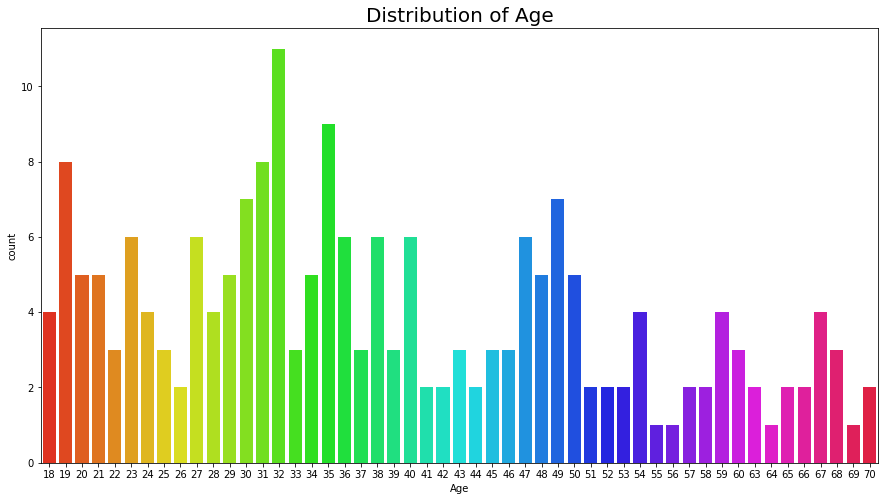

In [5]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

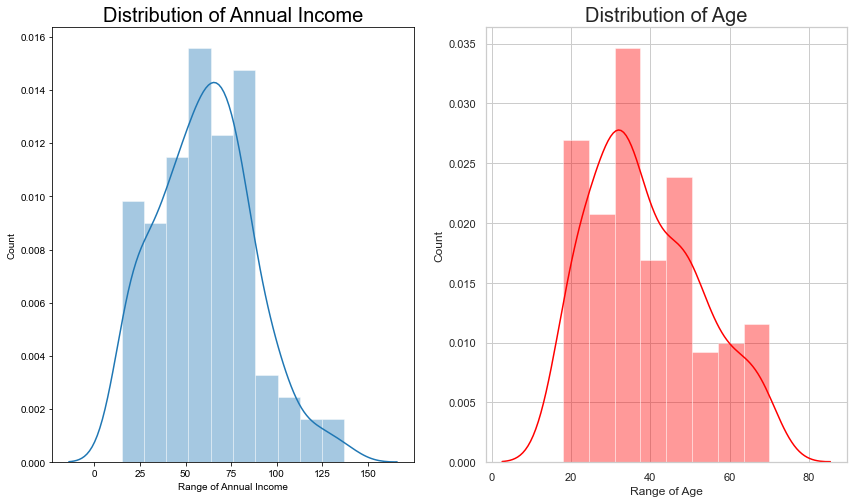

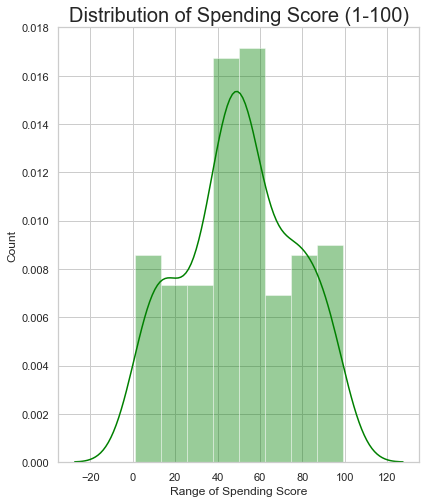

In [6]:
plt.rcParams['figure.figsize'] = (22, 8)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

plt.subplot(1,3,3)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.show()

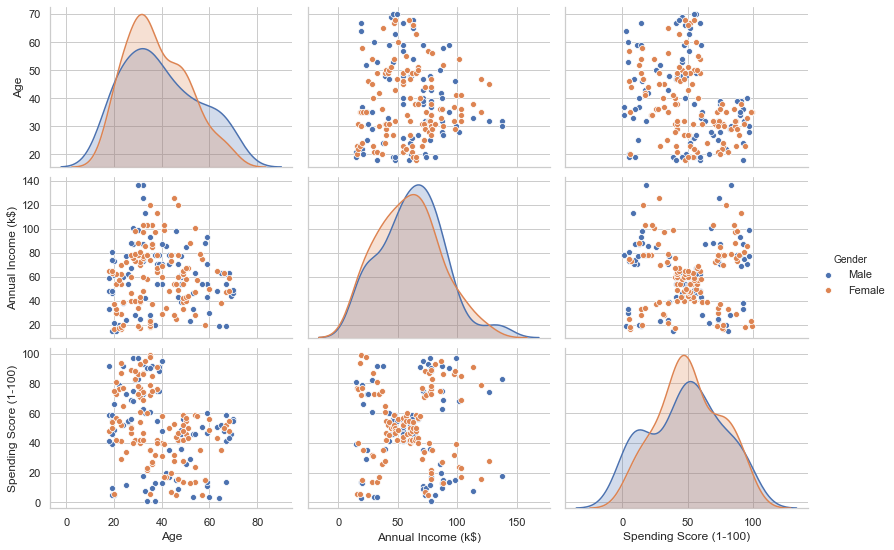

In [7]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [8]:
df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)

In [9]:
X = df.drop(['CustomerID',], axis=1)
from sklearn.cluster import KMeans

In [10]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

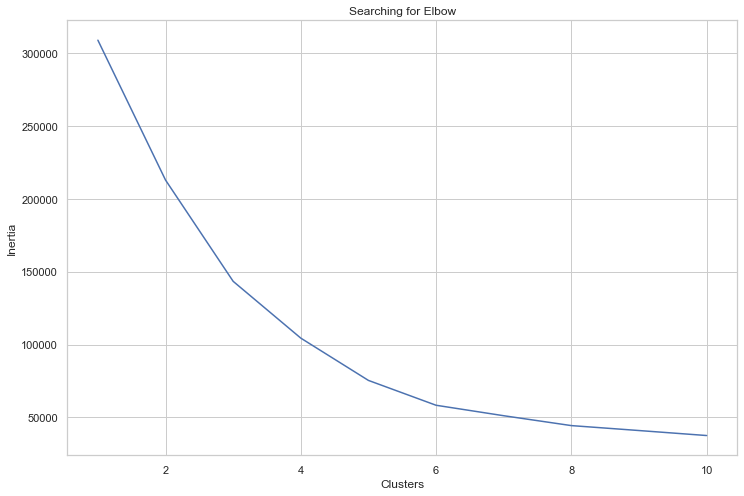

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

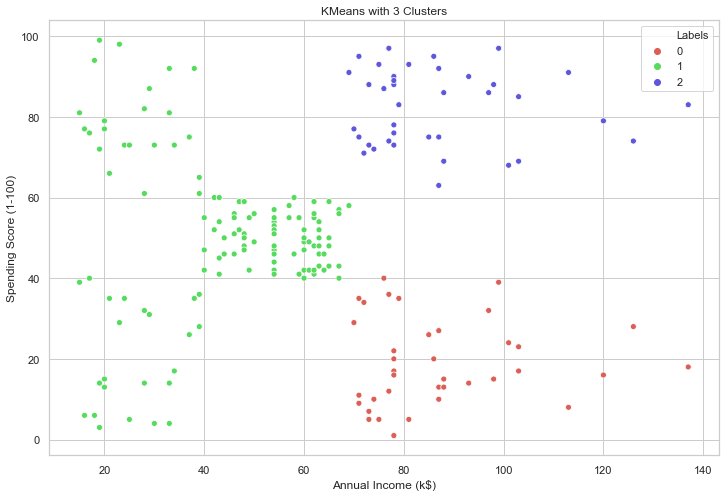

In [12]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

3 gruba bölerek kmeans denedik
;

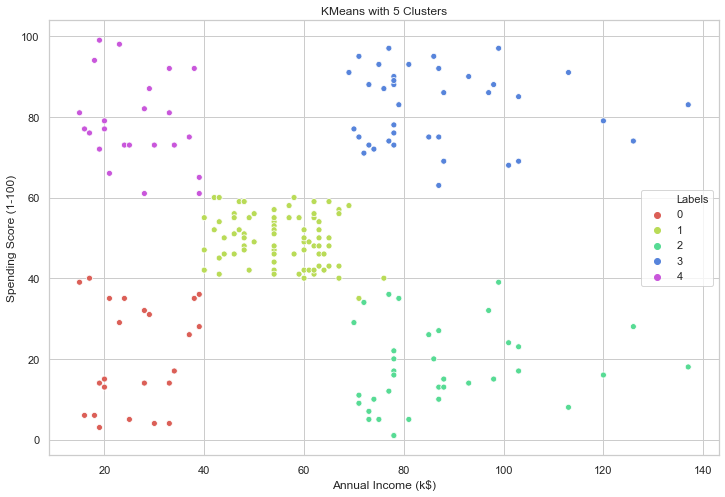

In [13]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

5 cluster daha iyi duruyor. 

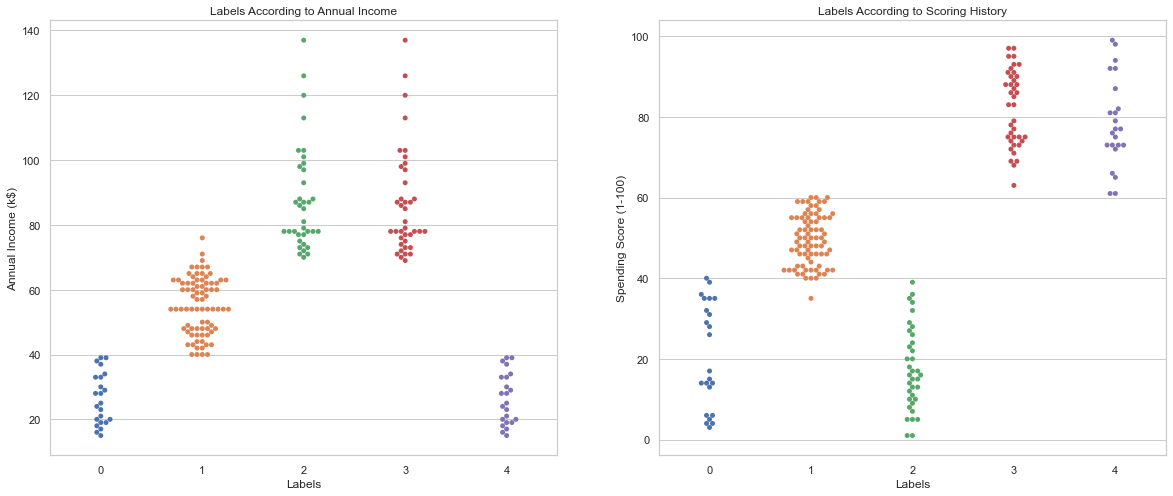

In [14]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income (k$)', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score (1-100)', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

Kmeans clustering ile işimiz bitti. 5 cluster en ideal olarak gözüküyor.

In [15]:
from sklearn.cluster import AgglomerativeClustering 

In [16]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

In [17]:
# kümeler = agglom.fit_predict(X)

In [18]:
# from sklearn import  metrics

# print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
#       .format(metrics.adjusted_rand_score(y, kümeler)))

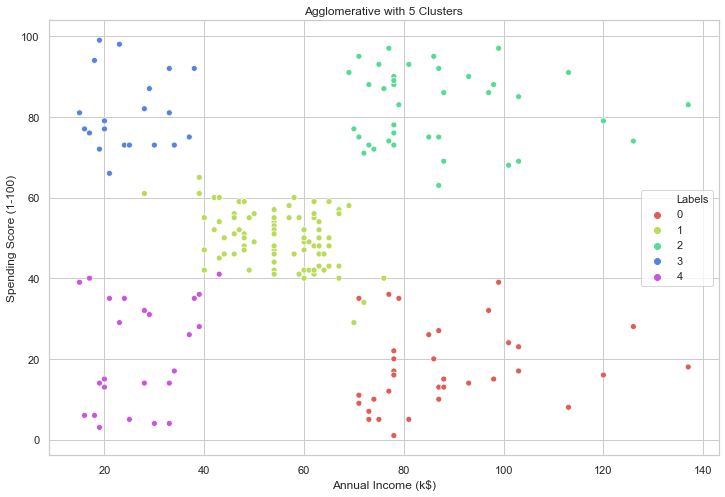

In [19]:
X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage



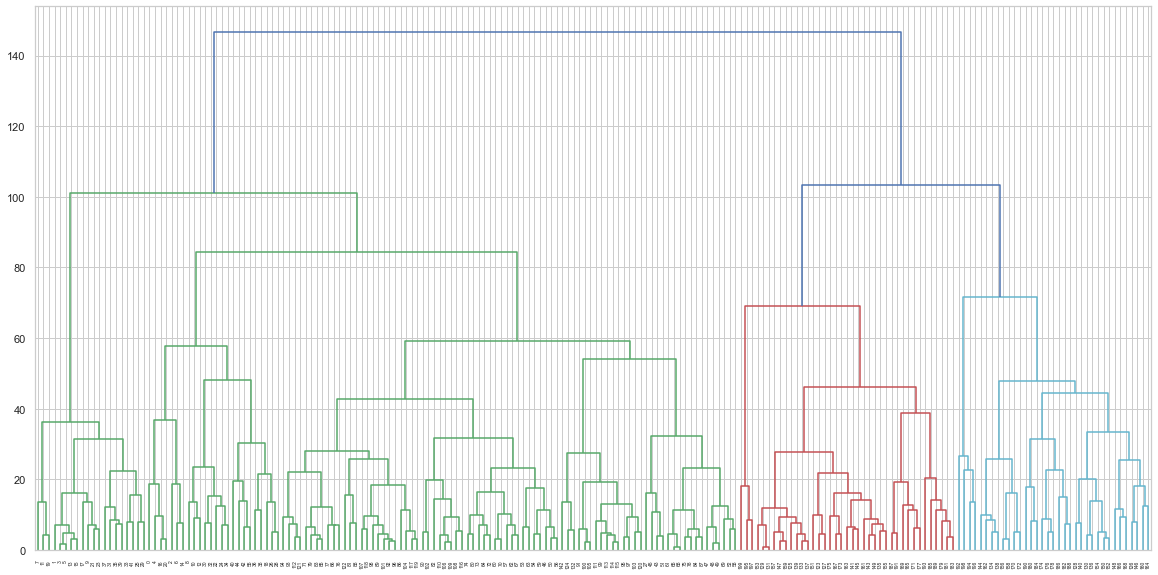

In [21]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='complete'))
plt.show()

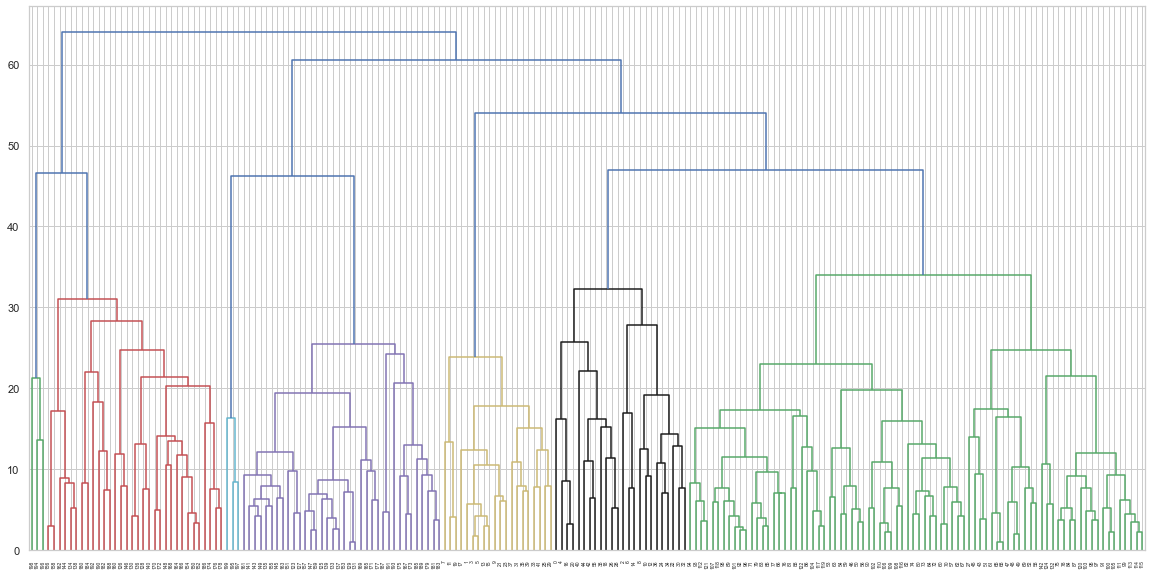

In [22]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='average'))
plt.show()

Bu dendrogramları nasıl analiz etmem gerektiğini bilmyiorum

In [23]:
from sklearn.cluster import DBSCAN 

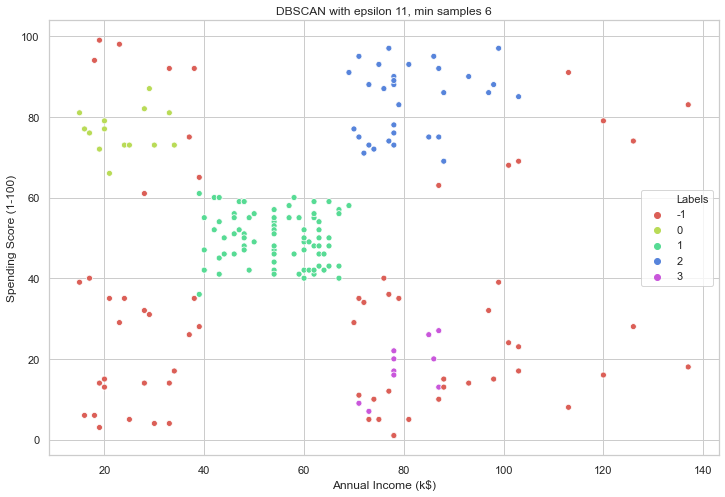

In [24]:

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Elimizdeki data az oluğu için dbscan başarılı sonuç veremedi.

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth

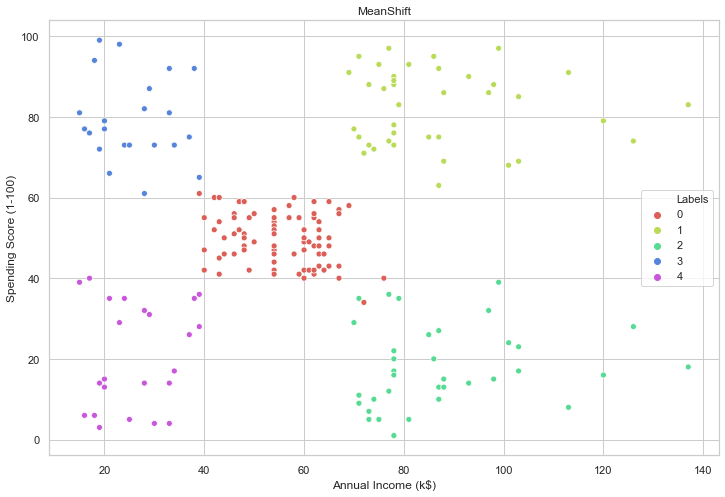

In [26]:
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [27]:
from sklearn.mixture import GaussianMixture

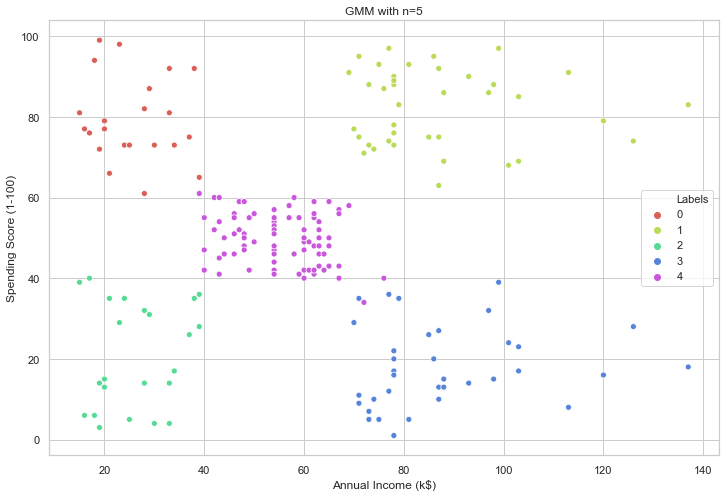

In [28]:
gmm_cluster = GaussianMixture(n_components=5, random_state=123)

gmm = gmm_cluster.fit_predict(X)

X['Labels'] = gmm
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('GMM with n=5')
plt.show()